In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [2]:
# import the datasets

day = pd.read_csv(r"C:\Users\Sheikh Nabil\Anaconda\Desktop\capital-bike-share\2011-12 Exploratory analysis\data set\day.csv")
hour = pd.read_csv(r"C:\Users\Sheikh Nabil\Anaconda\Desktop\capital-bike-share\2011-12 Exploratory analysis\data set\hour.csv")

In [3]:
# check for null data
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# BOTH DF ARE FREE OF MISSING VALUES

In [6]:
# Let's now have a look at the DFs
hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
hour.shape

(17379, 17)

In [9]:
day.shape

(731, 16)

In [10]:
# rename columns for more consistency

day.rename(columns={"dteday": "date", "yr": "year", "mnth":"month","weathersit":"weather_conditions", "atemp":"felt_temp", "hum":"humidity", "casual":"bike_casual_users", "registered":"bike_registered_users", "cnt":"tot_bike_users"}, inplace=True)
hour.rename(columns={"dteday": "date", "yr": "year", "mnth":"month","hr":"hour","weathersit":"weather_conditions", "atemp":"felt_temp", "hum":"humidity", "casual":"casual_users", "registered":"registered_users", "cnt":"tot_users"}, inplace=True)

In [11]:
# replace values for more consistency

hour["season"]=hour["season"].replace([1,2,3,4], ["Winter","Spring", "Summer", "Fall"])
hour["year"]=hour["year"].replace([0,1], ["2011","2012"])
hour["weekday"]=hour["weekday"].replace([1,2,3,4,5,6,0], ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"])
hour["workingday"]=hour["workingday"].replace([0,1], ["no","yes"])
hour["holiday"]=hour["holiday"].replace([0,1], ["no","yes"])
hour["weather_conditions"]=hour["weather_conditions"].replace([1,2,3,4], ["Sunny","Cloudy", "Rainy", "Stormy"])
hour["month"]=hour["month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ["January","February", "March", "April","May","June", "July", "August","September","October", "November", "December"])

In [12]:
day["season"]=day["season"].replace([1,2,3,4], ["Winter","Spring", "Summer", "Fall"])
day["year"]=day["year"].replace([0,1], ["2011","2012"])
day["weekday"]=day["weekday"].replace([1,2,3,4,5,6,0], ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Sathurday","Sunday"])
day["workingday"]=day["workingday"].replace([0,1], ["no","yes"])
day["holiday"]=day["holiday"].replace([0,1], ["no","yes"])
day["weather_conditions"]=day["weather_conditions"].replace([1,2,3,4], ["Sunny","Cloudy", "Rainy", "Stormy"])
day["month"]=day["month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ["January","February", "March", "April","May","June", "July", "August","September","October", "November", "December"])

In [13]:
# It would be interesting to have a look at the different data types I have available and think about possible conversions or replacing the current data with new labels

# eg. hour.dteday should be converted to a timestamp (datetime)
# eg. values in hour.season should be replaced with season names then the data should be converted to category

In [14]:
hour.dtypes

instant                 int64
date                   object
season                 object
year                   object
month                  object
hour                    int64
holiday                object
weekday                object
workingday             object
weather_conditions     object
temp                  float64
felt_temp             float64
humidity              float64
windspeed             float64
casual_users            int64
registered_users        int64
tot_users               int64
dtype: object

In [15]:
day.dtypes

instant                    int64
date                      object
season                    object
year                      object
month                     object
holiday                   object
weekday                   object
workingday                object
weather_conditions        object
temp                     float64
felt_temp                float64
humidity                 float64
windspeed                float64
bike_casual_users          int64
bike_registered_users      int64
tot_bike_users             int64
dtype: object

In [16]:
hour.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_conditions,temp,felt_temp,humidity,windspeed,casual_users,registered_users,tot_users
0,1,2011-01-01,Winter,2011,January,0,no,Saturday,no,Sunny,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,no,Saturday,no,Sunny,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,no,Saturday,no,Sunny,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,no,Saturday,no,Sunny,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,no,Saturday,no,Sunny,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
# data type conversion

hour["date"] = pd.to_datetime(hour["date"])
hour["season"] = hour["season"].astype('category')
hour["year"] = hour["year"].astype('category')
hour["month"] = hour["month"].astype('category')
hour["hour"] = hour["hour"].astype('category')
hour["holiday"] = hour["holiday"].astype('category')
hour["workingday"] = hour["workingday"].astype('category')
hour["weather_conditions"] = hour["weather_conditions"].astype('category')
hour["weekday"] = hour["weekday"].astype('category')

In [18]:
day["date"] =  pd.to_datetime(day["date"])
day["season"] = day["season"].astype('category')
day["year"] = day["year"].astype('category')
day["month"] = day["month"].astype('category')
day["holiday"] = day["holiday"].astype('category')
day["workingday"] = day["workingday"].astype('category')
day["weather_conditions"] = day["weather_conditions"].astype('category')
day["weekday"] = day["weekday"].astype('category')

In [19]:
# denormalizing temp, first prepare formula then check with range if formula is actually working correctly

# x = 47*y - 8
x = list(hour["temp"].values*47-8)
min_val = min(x)
max_val = max(x)
range_data = (min_val, max_val)
print(range_data)

(-7.06, 39.0)


In [20]:
# replacing values in corresponding columns 
hour["temp"].replace(hour["temp"].values, list(hour["temp"].values*47-8),inplace=True)
day["temp"].replace(day["temp"].values, list(day["temp"].values*47-8),inplace=True)

In [21]:
# applying the same method to other columns

day["felt_temp"].replace(day["felt_temp"].values, list(day["felt_temp"].values*66-16),inplace=True)
hour["felt_temp"].replace(hour["felt_temp"].values, list(hour["felt_temp"].values*66-16),inplace=True)
hour["windspeed"].replace(hour["windspeed"].values, list(hour["windspeed"].values*67),inplace=True)
day["windspeed"].replace(day["windspeed"].values, list(day["windspeed"].values*67),inplace=True)
hour["humidity"].replace(hour["humidity"].values, list(hour["humidity"].values*100),inplace=True)
day["humidity"].replace(day["humidity"].values, list(day["humidity"].values*100),inplace=True)

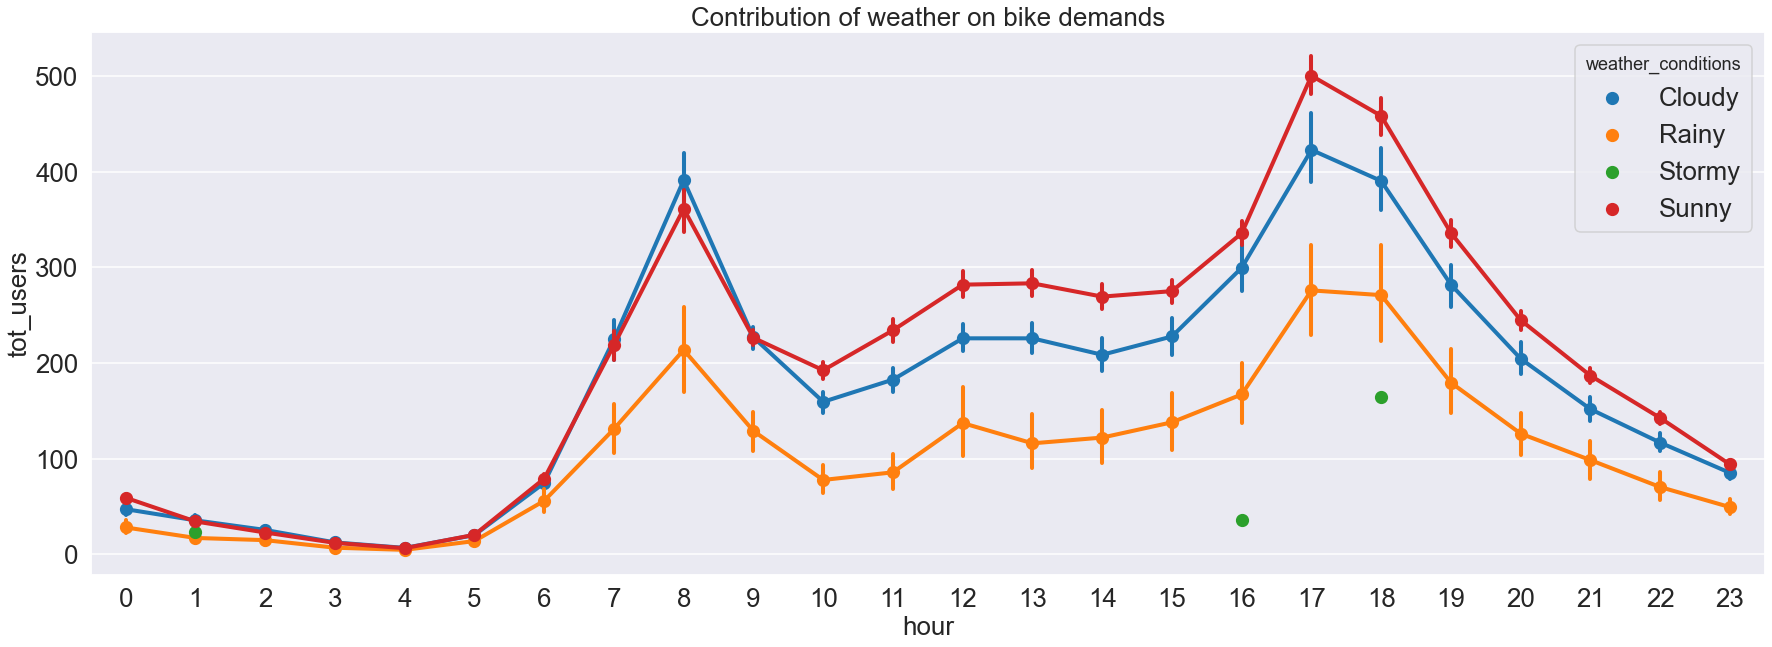

In [22]:
# 1st visualization - Contribution of weather on hourly bike demand

sns.set_style('darkgrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
fig,ax = plt.subplots()
sns.pointplot(data=hour[['hour',
                           'tot_users',
                           'weather_conditions']],
              x='hour',
              y='tot_users',
              hue='weather_conditions',
              ax=ax)
ax.set(title="Contribution of weather on bike demands");

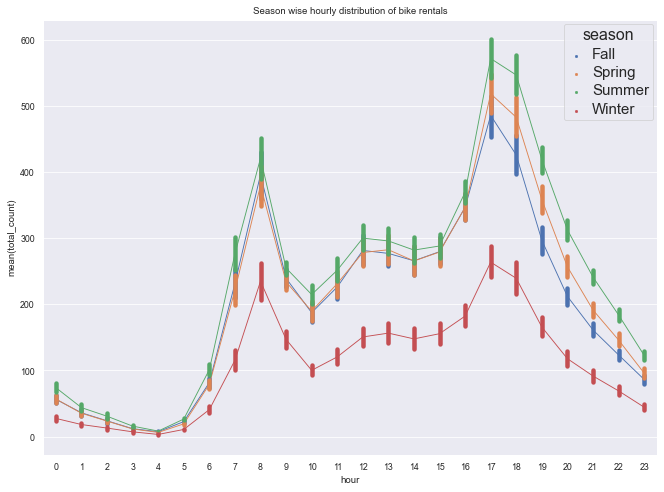

In [23]:
# 2nd visualization - 'Season wise hourly distribution of bike rentals'

sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("darkgrid")

#fig, ax = plt.subplots()
ax = sns.pointplot(data = hour[['hour','tot_users','season']], x = 'hour', y = 'tot_users', scale = 0.2, hue = 'season');

plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='16')

ax.set(title = 'Season wise hourly distribution of bike rentals',ylabel= 'mean(total_count)');

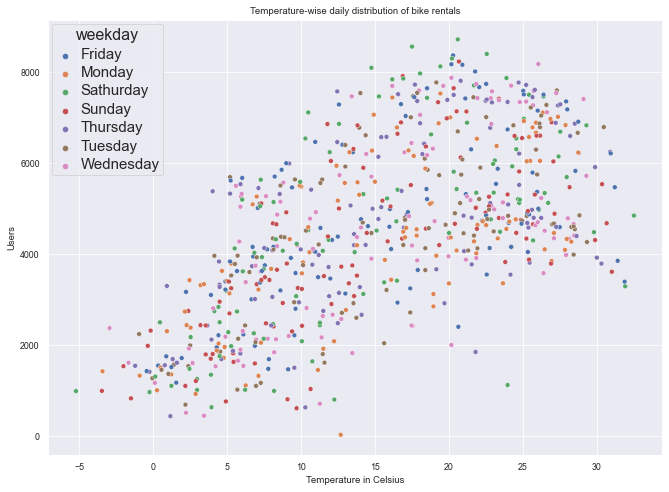

In [24]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("darkgrid")

#fig, ax = plt.subplots()
ax = sns.scatterplot(data = day[['temp','tot_bike_users','weekday']], x = 'temp', y = 'tot_bike_users',
               hue = 'weekday');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Temperature-wise daily distribution of bike rentals',ylabel= 'Users', xlabel='Temperature in Celsius');

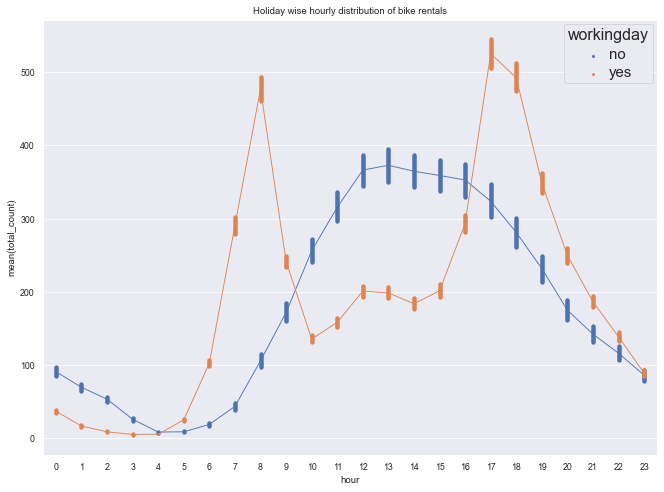

In [25]:

sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("darkgrid")

#fig, ax = plt.subplots()
ax = sns.pointplot(data = hour[['hour','tot_users','workingday']], x = 'hour', y = 'tot_users',
              scale = 0.2, hue = 'workingday');

plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='16')

ax.set(title = 'Holiday wise hourly distribution of bike rentals',ylabel= 'mean(total_count)', xlabel='hour');

In [26]:
list(hour.month.unique())

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

[Text(0.5, 1.0, 'Monthly distribution of bike rentals'),
 Text(0, 0.5, 'Mean(total_users)'),
 Text(0.5, 0, 'Month')]

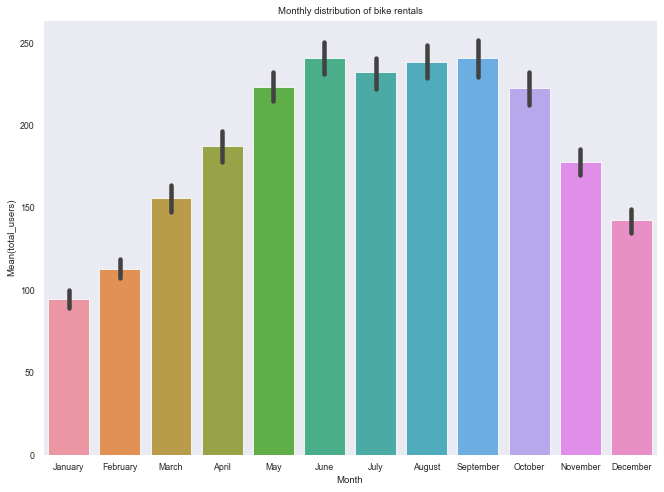

In [27]:
# MONTHLY DISTRIBUTION OF BIKE RENTALS

sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")

#fig, ax = plt.subplots()

ax = sns.barplot(data = hour[['tot_users','month']], x = 'month', y = 'tot_users', order=list(hour.month.unique()));
ax.set(title = 'Monthly distribution of bike rentals',ylabel= 'Mean(total_users)', xlabel='Month')